First, Import the data from csv

In [ ]:
import pandas as pd

# Load the dataset
df = 

# Display the first few rows of the DataFrame
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Now, lets find out if there is any missing data for each features.

In [ ]:
# Check for missing values in each column
missing_data = 

# Display the result
print(missing_data)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Look at the data, what is the nessacery things must be done to make the data good for use?

1. We have sex, smoker and region having text labels. So we need to encoding the text data, transform to numeric data

In [ ]:
# Convert 'sex' to binary (male: 0, female: 1)
df['sex']

# Convert 'smoker' to binary (no: 0, yes: 1)
df['smoker']

# Convert 'region' to categorical types and then use one-hot encoding
df = pd.get_dummies(df, columns=['region'])

# Convert value of region to numerical numbers 0 and 1
df['region_northeast']
df['region_northwest']
df['region_southeast']
df['region_southwest']
print(df[:5])

   age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    1  27.900         0       1  16884.92400                 0   
1   18    0  33.770         1       0   1725.55230                 0   
2   28    0  33.000         3       0   4449.46200                 0   
3   33    0  22.705         0       0  21984.47061                 0   
4   32    0  28.880         0       0   3866.85520                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  


The data is good to go!
HOWEVER, they are not in the same range. We need to re-scail it to -1 ~ 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler with the desired range
scaler = MinMaxScaler(feature_range=(-1, 1))

# Columns to rescale (age, bmi, children, charges)
columns_to_scale = 

# Apply scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the result
print(df[columns_to_scale].head())


        age       bmi  children   charges
0 -0.956522 -0.357546      -1.0 -0.496778
1 -1.000000 -0.041700      -0.6 -0.980728
2 -0.565217 -0.083132       0.2 -0.893770
3 -0.347826 -0.637073      -1.0 -0.333980
4 -0.391304 -0.304816      -1.0 -0.912369


Now, it is time for train!
But in real scenarios, we want to test the result but we do not have a separate dataset. The most common way is to split the dataset to 2, train for training our model, test for verifying the result.

In [5]:
from sklearn.model_selection import train_test_split

# 1. Separate features and target variable
X = df.drop('charges', axis=1)  # Features
y = df['charges']               # Target variable

# 2. Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. Verify the split by printing the shapes
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')


Training set size: 1070 samples
Testing set size: 268 samples


Train the model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize the Linear Regression model
model = 

# 2. Train the model using the training data



LinearRegression()

Test the result by make prediction using the model

In [9]:
# 3. Make predictions on the test data
y_pred = model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 0.03422016278311184
R^2 Score: 0.783720118047211


In [7]:
import pandas as pd

# Compare predictions and actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the comparison
print(comparison_df.head())


        Actual  Predicted
764  -0.745463  -0.750977
887  -0.867505  -0.805664
890  -0.099449   0.146484
1293 -0.738860  -0.729492
259   0.041634  -0.167969


Visualize the result

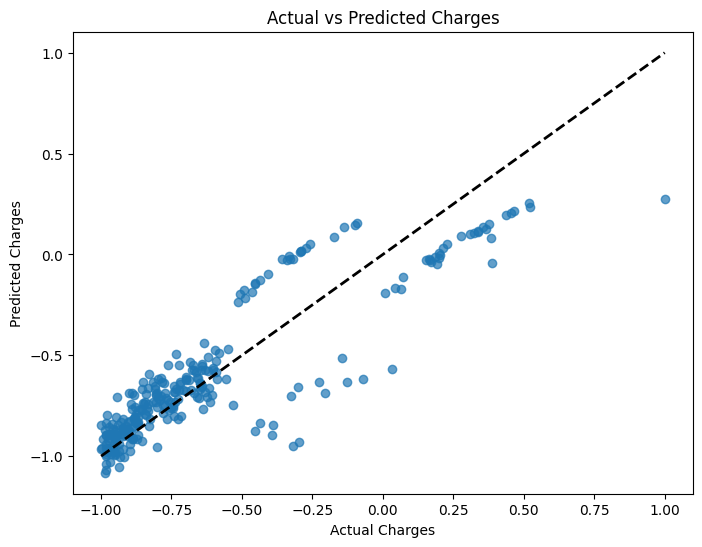

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
# todo

plt.show()
